In [1]:
import numpy as np
import pycyc
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from plotting import plot_intrinsic_vs_observed
import copy
import pickle
import importlib
import sys

In [2]:
mpl.rcParams["image.aspect"] = "auto"

In [3]:
from scipy.fft import rfft, fft, fftshift, ifft, fftn, ifftn

CS = pycyc.CyclicSolver("P2067/chan07/53873.27864.07.15s.cyc", zap_edges = 0.05556, pscrunch=True)
CS.data.shape, CS.nspec

CS.load("P2067/chan07/53873.31676.07.15s.cyc")
CS.data.shape, CS.nspec

CS.save_cyclic_spectra = 1
CS.initProfile(maxsubint=128)

with open ("cs_post_init.pkl", "wb") as fh:
    pickle.dump(CS, fh)

In [4]:
with open ("cs_post_init.pkl", "rb") as fh:
    CS = pickle.load(fh)

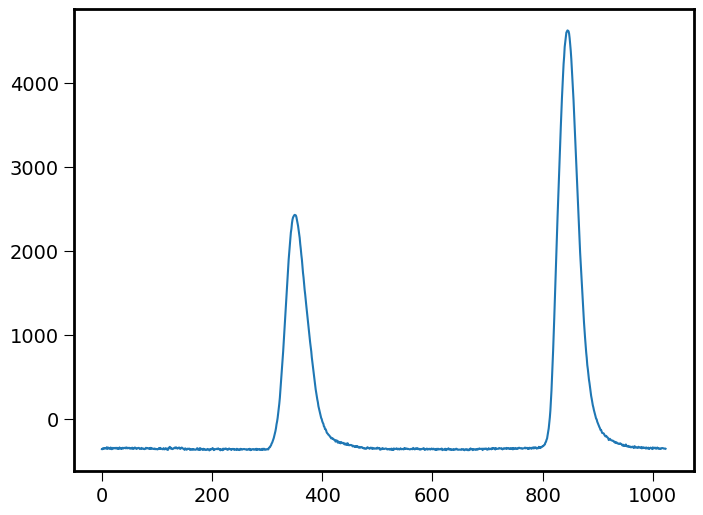

In [5]:
plt.plot(CS.pp_int)

In [6]:
# reload a module to incorporate code chanegs

if "pycyc" in sys.modules.keys():
    print("Updated pycyc")
    importlib.reload(sys.modules["pycyc"])
import pycyc

if "fista" in sys.modules.keys():
    print("Updated fista")
    importlib.reload(sys.modules["fista"])
import fista

Updated pycyc


In [7]:
# FISTA DA LOT!
CS.iprint = 1
CS.make_plots = 0
CS.niter = 0
CS.save_cyclic_spectra = 1
CS.initWavefield()

initial filter: isub=0/128 delay=4086
grad: (7448.221241354534+0j) new dgrad: (875.9084697906821+0j) c: (-0.8981152104319452-0.000239400685626626j)
merit= 1.7343147e+06  grad= 7.4482212e+03
initial filter: isub=1/128 delay=4078
grad: (7255.14816783252+0j) new dgrad: (907.8104982602482+0j) c: (-0.90337072569645-0.00043380590009261237j)
merit= 1.7717872e+06  grad= 7.2551482e+03
initial filter: isub=2/128 delay=4092
grad: (7201.741826263797+0j) new dgrad: (854.9013017671618+0j) c: (-0.8956718113668505-0.00013215381980640322j)
merit= 1.9173546e+06  grad= 7.2017418e+03
initial filter: isub=3/128 delay=1
grad: (7323.482948057482+0j) new dgrad: (762.6466929387391+0j) c: (-0.8809089820657111+0.00014045936779626591j)
merit= 2.1244965e+06  grad= 7.3234829e+03
initial filter: isub=4/128 delay=4073
grad: (6985.122047084504+0j) new dgrad: (886.0284937043725+0j) c: (-0.9021541014237587+0.00014189501480230948j)
merit= 2.0609838e+06  grad= 6.9851220e+03
initial filter: isub=5/128 delay=11
grad: (6962.

grad: (7693.814320488708+0j) new dgrad: (1172.3429243415833+0j) c: (-0.9374006391523358+0.00020517318264366813j)
merit= 2.2940499e+06  grad= 7.6938143e+03
initial filter: isub=44/128 delay=36
grad: (7545.1943536337585+0j) new dgrad: (1214.0511680839093+0j) c: (-0.9433781196103299+0.0002731852995198165j)
merit= 2.2271185e+06  grad= 7.5451944e+03
initial filter: isub=45/128 delay=4094
grad: (7697.248732504737+0j) new dgrad: (1077.2852419116343+0j) c: (-0.9259370762292027+0.0003294806837484111j)
merit= 2.3145126e+06  grad= 7.6972487e+03
initial filter: isub=46/128 delay=13
grad: (7389.149009012823+0j) new dgrad: (1129.8341023403982+0j) c: (-0.934370287409619+0.0005003123747534835j)
merit= 2.1733980e+06  grad= 7.3891490e+03
initial filter: isub=47/128 delay=4084
grad: (7381.7282298896935+0j) new dgrad: (1081.6158676394055+0j) c: (-0.9284823542894391+0.0007630923476881873j)
merit= 2.1492341e+06  grad= 7.3817282e+03
initial filter: isub=48/128 delay=4089
grad: (7235.372387606922+0j) new dgra

grad: (9085.478758543566+0j) new dgrad: (1589.3062225141448+0j) c: (-0.9658102536458079-0.0002543404509379219j)
merit= 1.8335356e+06  grad= 9.0854788e+03
initial filter: isub=87/128 delay=14
grad: (8786.523875775452+0j) new dgrad: (1614.1054151742444+0j) c: (-0.970323469928133-8.708796938092432e-05j)
merit= 1.8644501e+06  grad= 8.7865239e+03
initial filter: isub=88/128 delay=7
grad: (8858.674460900376+0j) new dgrad: (1402.1550614676667+0j) c: (-0.9526472063084259-0.0001424212040845281j)
merit= 2.1816446e+06  grad= 8.8586745e+03
initial filter: isub=89/128 delay=4093
grad: (8405.931466445913+0j) new dgrad: (1326.1164880025754+0j) c: (-0.948794305113903-6.460834856422126e-05j)
merit= 2.3138028e+06  grad= 8.4059315e+03
initial filter: isub=90/128 delay=5
grad: (8037.878578267092+0j) new dgrad: (1243.5721082257942+0j) c: (-0.9432627401945642-0.0006619787962777598j)
merit= 2.4784324e+06  grad= 8.0378786e+03
initial filter: isub=91/128 delay=0
grad: (7779.654885923605+0j) new dgrad: (1207.98

In [8]:
CS.merit

250859078.34217602

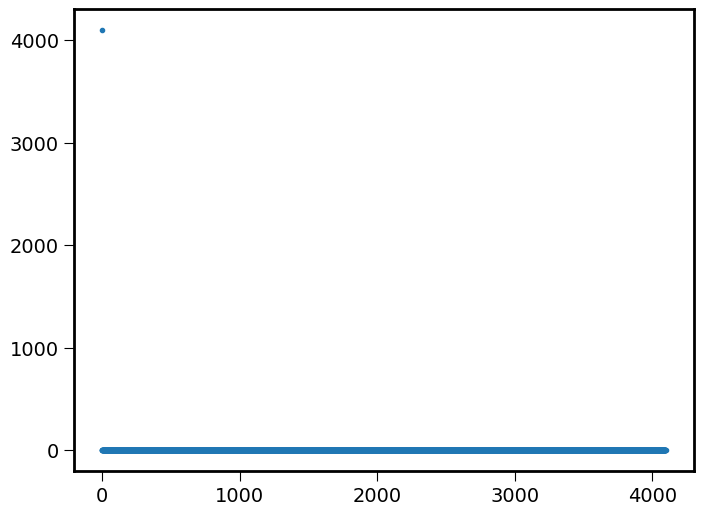

In [9]:
CS.h_doppler_delay_grad.shape
plt.plot (np.real(CS.h_time_delay[100]), ".")

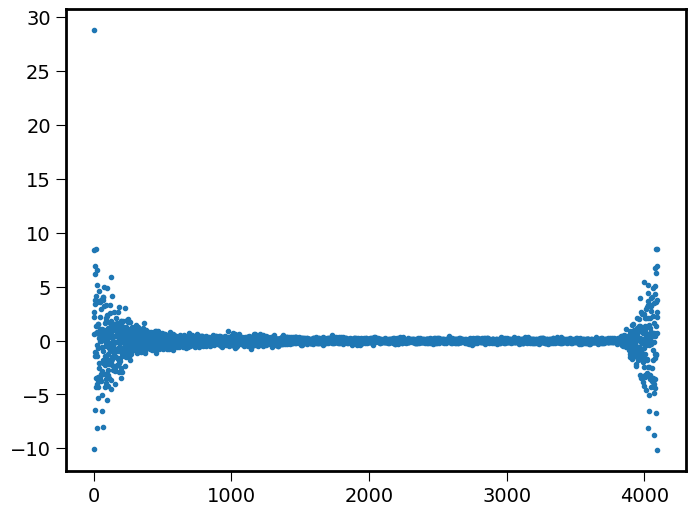

In [10]:
plt.plot (np.real(CS.h_time_delay_grad[0]), ".")

In [11]:
CS.h_doppler_delay.shape

(128, 4096)

In [12]:
y_n = np.copy(CS.h_doppler_delay)
x_n = np.copy(CS.h_doppler_delay)
t_n = 1
demerits = np.array([])
x_n, y_n, L, t_n, demerits = fista.take_fista_step(i=0, func=CS, 
    backtrack=True, alpha=1.0, eta=10, y_n=y_n, _lambda=None,
    delay_for_inf=-int(CS.nchan/2), 
    zero_penalty_coords = np.array([]),
    fix_phase_value = None,
    fix_phase_coords = None,
    fix_support= np.array([]),
    t_n=t_n,
    x_n=x_n,
    demerits = demerits,
    eps = None,
)

2023-04-19 17:56:11,992 - H-FISTA.fista - INFO - backtrack_B3 found 1e+13 after 13 iterations. Model has 524288 el.
2023-04-19 17:56:12,008 - H-FISTA.fista - INFO - in iteration 0, x_np1 has 524288 non-zero elements with demerit 2.51e+08


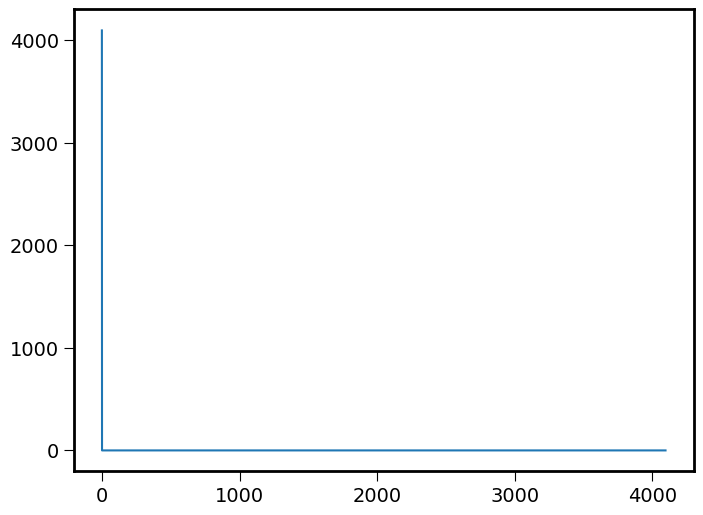

In [13]:
plt.plot (np.real(y_n[0]))
#plt.ylim((-5e-1,5e-1))

In [14]:
CS.nopt += 1
CS.updateProfile(x_n)

update profile isub=0/128
update profile isub=1/128
update profile isub=2/128
update profile isub=3/128
update profile isub=4/128
update profile isub=5/128
update profile isub=6/128
update profile isub=7/128
update profile isub=8/128
update profile isub=9/128
update profile isub=10/128
update profile isub=11/128
update profile isub=12/128
update profile isub=13/128
update profile isub=14/128
update profile isub=15/128
update profile isub=16/128
update profile isub=17/128
update profile isub=18/128
update profile isub=19/128
update profile isub=20/128
update profile isub=21/128
update profile isub=22/128
update profile isub=23/128
update profile isub=24/128
update profile isub=25/128
update profile isub=26/128
update profile isub=27/128
update profile isub=28/128
update profile isub=29/128
update profile isub=30/128
update profile isub=31/128
update profile isub=32/128
update profile isub=33/128
update profile isub=34/128
update profile isub=35/128
update profile isub=36/128
update prof

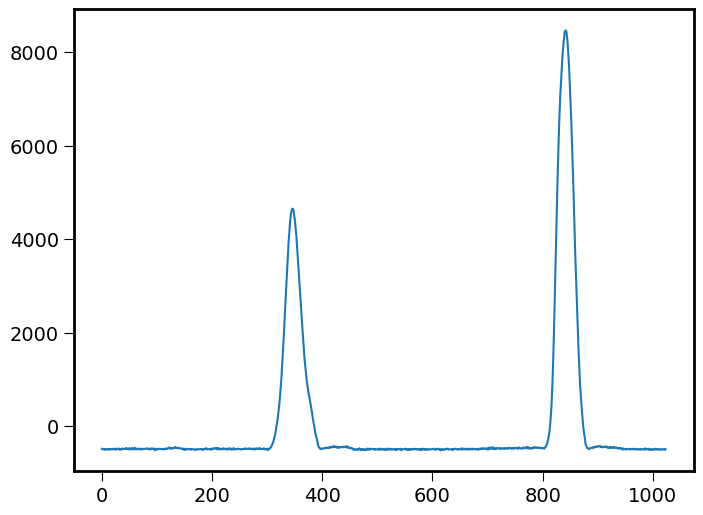

In [29]:
plt.plot(CS.pp_int)

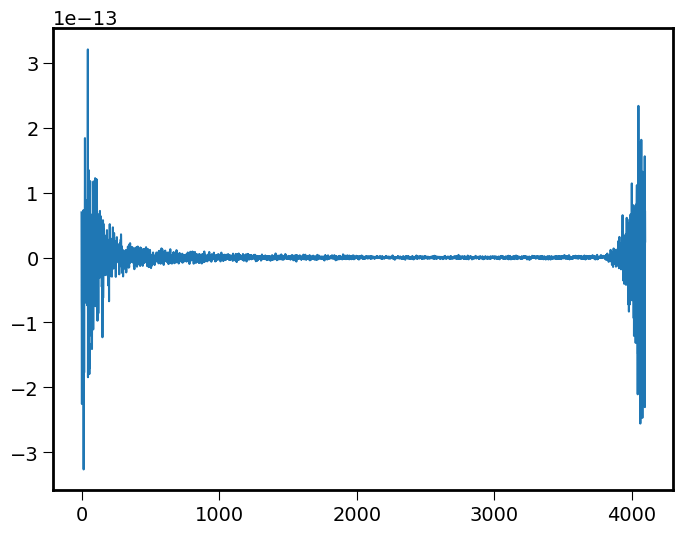

In [16]:
plt.plot (np.real(y_n[1]))

In [17]:
CS.updateWavefield ()
CS.merit

update filter isub=0/128
grad: (7448.221241354469+0j) new dgrad: (875.9084697906388+0j) c: (-0.8981152104319432-0.00023940068562666912j)
merit= 1.7343147e+06  grad= 7.4482212e+03
update filter isub=1/128
grad: (7255.148167832458+0j) new dgrad: (907.8104982602082+0j) c: (-0.9033707256964485-0.00043380590009265145j)
merit= 1.7717872e+06  grad= 7.2551482e+03
update filter isub=2/128
grad: (7201.741826263737+0j) new dgrad: (854.9013017671252+0j) c: (-0.8956718113668491-0.0001321538198064281j)
merit= 1.9173546e+06  grad= 7.2017418e+03
update filter isub=3/128
grad: (7323.4829480574235+0j) new dgrad: (762.646692938705+0j) c: (-0.8809089820657093+0.0001404593677962448j)
merit= 2.1244965e+06  grad= 7.3234829e+03
update filter isub=4/128
grad: (6985.1220470844455+0j) new dgrad: (886.0284937043384+0j) c: (-0.9021541014237576+0.00014189501480230495j)
merit= 2.0609838e+06  grad= 6.9851220e+03
update filter isub=5/128
grad: (6962.61356488914+0j) new dgrad: (963.1317464758171+0j) c: (-0.914026555077

grad: (7389.149009012753+0j) new dgrad: (1129.8341023403514+0j) c: (-0.9343702874096181+0.0005003123747535054j)
merit= 2.1733980e+06  grad= 7.3891490e+03
update filter isub=47/128
grad: (7381.7282298896225+0j) new dgrad: (1081.6158676393604+0j) c: (-0.9284823542894378+0.0007630923476882166j)
merit= 2.1492341e+06  grad= 7.3817282e+03
update filter isub=48/128
grad: (7235.37238760686+0j) new dgrad: (989.0594953384475+0j) c: (-0.9166627083872603+0.00046445709383220886j)
merit= 2.1202618e+06  grad= 7.2353724e+03
update filter isub=49/128
grad: (6840.472894828388+0j) new dgrad: (1002.436515330313+0j) c: (-0.9206992318940601+0.00034528998399523987j)
merit= 1.9925003e+06  grad= 6.8404729e+03
update filter isub=50/128
grad: (7252.62854525288+0j) new dgrad: (815.5750603351786+0j) c: (-0.8905191298553922+0.00018805205414186113j)
merit= 2.1616291e+06  grad= 7.2526285e+03
update filter isub=51/128
grad: (7418.235299055426+0j) new dgrad: (909.6536463490846+0j) c: (-0.9038581213893334+0.000314251399

grad: (7896.100382638697+0j) new dgrad: (1178.4668755142065+0j) c: (-0.9374160617312385-0.0004107091760848484j)
merit= 2.5300478e+06  grad= 7.8961004e+03
update filter isub=93/128
grad: (7606.743120449368+0j) new dgrad: (1263.5158277154555+0j) c: (-0.9490760961163669+0.00021880200205610145j)
merit= 2.2889120e+06  grad= 7.6067431e+03
update filter isub=94/128
grad: (7497.433557652702+0j) new dgrad: (1233.2046093284127+0j) c: (-0.9464237803669349-0.00021579045707910261j)
merit= 2.1718610e+06  grad= 7.4974336e+03
update filter isub=95/128
grad: (7783.110939148502+0j) new dgrad: (1100.0858249563526+0j) c: (-0.9283384173977088-0.00022000030496345757j)
merit= 2.2889774e+06  grad= 7.7831109e+03
update filter isub=96/128
grad: (8124.785338107911+0j) new dgrad: (1026.605784249742+0j) c: (-0.9182207527260038+6.075836108003714e-05j)
merit= 2.3711837e+06  grad= 8.1247853e+03
update filter isub=97/128
grad: (8072.320421707085+0j) new dgrad: (1167.3574771327146+0j) c: (-0.9342254869966959+0.00018985

250859078.34217572

x_n, y_n, L, t_n, demerits = fista.take_fista_step(i=1, func=CS, 
    backtrack=True, alpha=1.0/L, eta=1.5, y_n=y_n, _lambda=None,
    delay_for_inf=-int(CS.nchan/2), 
    zero_penalty_coords = np.array([]),
    fix_phase_value = None,
    fix_phase_coords = None,
    fix_support= np.array([]),
    t_n=t_n,
    x_n=x_n,
    demerits = demerits,
    eps = None,
)

Manual experimentation with Lipschitz

In [18]:
x_n, y_n, L, t_n, demerits = fista.take_fista_step(i=1, func=CS, 
    backtrack=False, alpha=2.5, eta=1.5, y_n=y_n, _lambda=None,
    delay_for_inf=-int(CS.nchan/2), 
    zero_penalty_coords = np.array([]),
    fix_phase_value = None,
    fix_phase_coords = None,
    fix_support= np.array([]),
    t_n=t_n,
    x_n=x_n,
    demerits = demerits,
    eps = None,
)

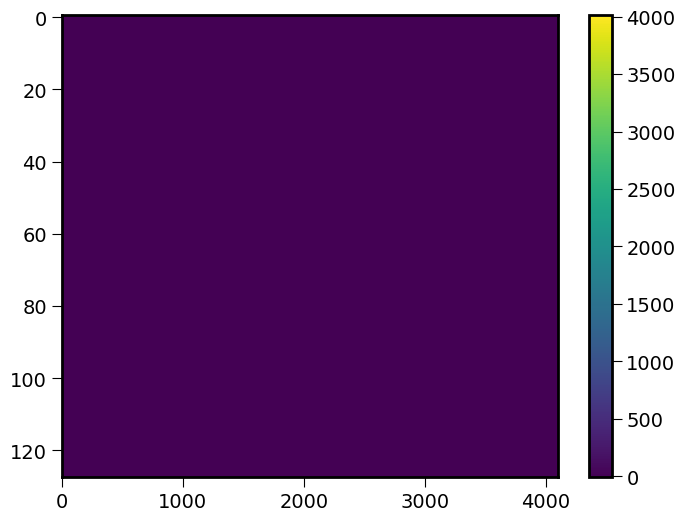

In [19]:
plt.imshow(np.real(x_n))
plt.colorbar()

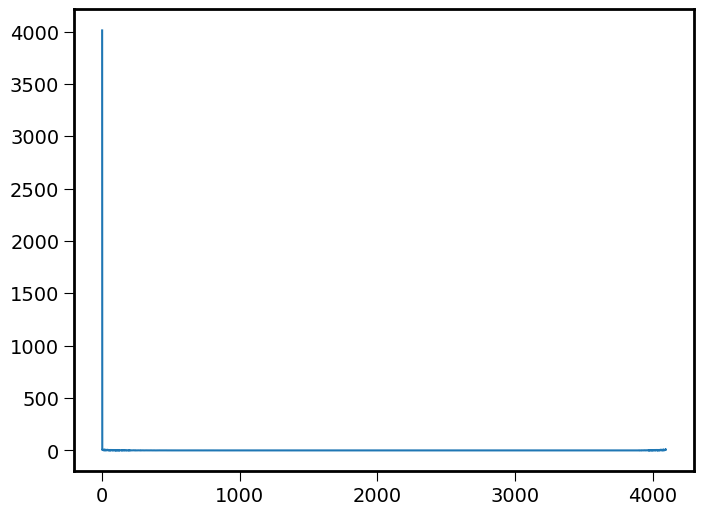

In [20]:
plt.plot(np.abs(x_n[0]))

In [21]:
with open(f"profiles_3.pkl", "rb") as fh:
    pp = pickle.load(fh)
ppsum = pp.sum(axis=0)

In [ ]:
CS.iprint = 0
merit = CS.merit
best = np.copy(x_n)

grad: (1.4401886507299333+0j) new dgrad: (0.5985636645674628+0j) c: (-0.021742638217421797+0.0021942120238909696j)
grad: (1.7351594092370624+0j) new dgrad: (0.3544343102691362+0j) c: (-0.005565496544329879-0.010718938994162283j)
grad: (1.716238309744434+0j) new dgrad: (0.4590405047223264+0j) c: (-0.002895982727370398-0.008775969263216808j)
grad: (1.9520742549913939+0j) new dgrad: (0.40217126018384886+0j) c: (0.0016156206040032924-0.011075990119595286j)
grad: (1.2694310730008516+0j) new dgrad: (0.4546148970079117+0j) c: (-0.020043693321169863-0.00992205301481879j)
grad: (1.441689536697624+0j) new dgrad: (0.3429921520156223+0j) c: (0.0006351745818233659-0.02247491962130556j)
grad: (2.26822025172363+0j) new dgrad: (0.6899166051484282+0j) c: (0.018245230805458108-0.033460376312177735j)
grad: (1.8853540347899935+0j) new dgrad: (0.47520363057815274+0j) c: (0.053809999564932466-0.0064879627434580155j)
grad: (1.498102633698501+0j) new dgrad: (0.40484115404936016+0j) c: (0.024468213207119453+0.

grad: (1.2795443287947734+0j) new dgrad: (0.7408555331522264+0j) c: (-0.001021987612338365+0.021802942555328875j)
grad: (1.3736777019831623+0j) new dgrad: (0.4989483477277592+0j) c: (-0.04059208290325099+0.007852750465321481j)
grad: (1.4270671957105154+0j) new dgrad: (0.5919408674579165+0j) c: (0.03251787949285652-0.01705382254212502j)
grad: (1.4335337540033042+0j) new dgrad: (0.5507863156489955+0j) c: (-0.010230130177978317+0.034764119554811j)
grad: (68.3263472280884+0j) new dgrad: (5.623860960662083+0j) c: (-0.7312652899665284-0.00447910466607252j)
grad: (513.9288674610572+0j) new dgrad: (59.32494672406929+0j) c: (-0.8296611111340931-0.001349022796474467j)
grad: (1790.496088633355+0j) new dgrad: (240.32394485532993+0j) c: (-0.8732083378370418-0.00013359945841182335j)
grad: (326.83840526706996+0j) new dgrad: (33.438740860413816+0j) c: (-0.800229829122842-0.0007281500396813523j)
grad: (100.64060586516086+0j) new dgrad: (7.440854080746961+0j) c: (-0.6952177471566776-0.001284109857774642

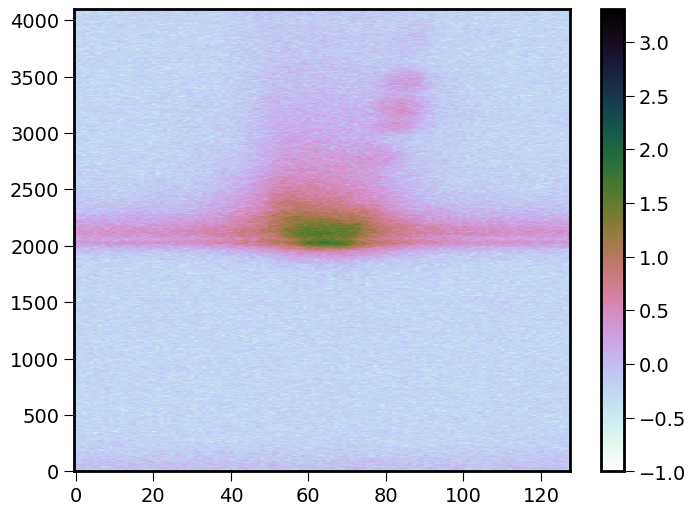

grad: (0.690289354802454+0j) new dgrad: (0.5647198380140994+0j) c: (-0.001183867327676874-0.0069618702057670295j)
grad: (0.8659320420865931+0j) new dgrad: (0.39624952191595686+0j) c: (-0.01539270246037511-0.015517991796193257j)
grad: (0.9373235281234144+0j) new dgrad: (0.4861503645641573+0j) c: (-0.03134310677383434+0.003027076853770454j)
grad: (0.9956358813973427+0j) new dgrad: (0.45574334758184937+0j) c: (-0.015943055650422186-0.002729410902981392j)
grad: (0.8633908931882437+0j) new dgrad: (0.45879879759872005+0j) c: (-0.027404268685527353-0.008013388489439614j)
grad: (0.8541346014097015+0j) new dgrad: (0.40316651141922616+0j) c: (0.019588197909874455-0.03019975483540075j)
grad: (1.465267380785088+0j) new dgrad: (0.7629007091753359+0j) c: (0.004407528369231214-0.02307349066602386j)
grad: (1.1863579144092111+0j) new dgrad: (0.5402478404595279+0j) c: (0.018283647336579473-0.008800321467956706j)
grad: (0.9748128312369534+0j) new dgrad: (0.4658284050590553+0j) c: (-0.017948202930638108-0

grad: (0.7425382085961602+0j) new dgrad: (0.8214564561367361+0j) c: (-0.04650301167809378+0.021037921876740095j)
grad: (0.7065798928635487+0j) new dgrad: (0.5820200910432325+0j) c: (-0.03502118405878931+0.005509674887785405j)
grad: (0.7845454407733627+0j) new dgrad: (0.56454806237273+0j) c: (0.027199399060457284-0.0027345815755238454j)
grad: (0.8694516411268465+0j) new dgrad: (0.47352477077859756+0j) c: (0.014231150428070194-0.014990171166469633j)
grad: (60.33348229454239+0j) new dgrad: (5.396976848674853+0j) c: (-0.5378806054332468+0.004143872559793716j)
grad: (593.941728555154+0j) new dgrad: (39.13610901287013+0j) c: (-0.5046678002518256+0.002331439634739131j)
grad: (1739.4043971904043+0j) new dgrad: (91.74158435116587+0j) c: (-0.30551507988350607+0.0009773437566715259j)
grad: (387.1931132642685+0j) new dgrad: (27.878303527759744+0j) c: (-0.5247439066252694+0.0014973842539222077j)
grad: (91.30847721312651+0j) new dgrad: (7.2315131687007455+0j) c: (-0.503230836132351+0.001754689366035

grad: (1.426490363785006+0j) new dgrad: (0.39236645330825926+0j) c: (0.041586178066113436-0.001795223668442749j)
grad: (1.3855507783033865+0j) new dgrad: (0.3474219248914834+0j) c: (-0.04455611981216477+0.009250694703602798j)
grad: (1.1647712644747497+0j) new dgrad: (0.3409486492999326+0j) c: (0.00862663698147859-0.006527295428817083j)
grad: (0.927861699699748+0j) new dgrad: (0.5110370275990814+0j) c: (0.0567307349975566-0.002729476551962356j)
grad: (1.050109131596656+0j) new dgrad: (0.6230802376092519+0j) c: (0.03900716339014356+0.014926935737640215j)
grad: (1.484965844637029+0j) new dgrad: (0.504239961166209+0j) c: (0.02713636498218324+0.038470933342067797j)
grad: (0.9147517553478229+0j) new dgrad: (0.46915489077492156+0j) c: (0.031138460784247972-0.01410988786064615j)
grad: (1.3080813040315298+0j) new dgrad: (0.3359561273435495+0j) c: (0.0082341772689882-0.0061873478619764504j)
grad: (1.7533807945812458+0j) new dgrad: (0.3113970669638807+0j) c: (-0.06908132212898009-0.01454685159862

grad: (1.8285440253201646+0j) new dgrad: (0.6213129615799109+0j) c: (-0.029822132541066602+0.01454990971605848j)
grad: (1.3731151110518063+0j) new dgrad: (0.5262454087758749+0j) c: (-0.03119952160176755-0.0027180140839580444j)
grad: (1.7365833604005263+0j) new dgrad: (0.5371144039207664+0j) c: (-0.1302828167020692+0.005812411477086574j)
grad: (1.5794160744902461+0j) new dgrad: (0.4718234052120076+0j) c: (0.03178884047513555-0.0013424046614619665j)
grad: (2.1989650718680664+0j) new dgrad: (0.5320398695011921+0j) c: (-0.006121390407205911-0.02592772387211391j)
grad: (1.6814441016605264+0j) new dgrad: (0.9908033886689256+0j) c: (-0.11033568726797685-0.041851967510233554j)
grad: (2.1097110625190254+0j) new dgrad: (0.5808401444013519+0j) c: (-0.04972308379153168-0.03935750397736159j)
grad: (3.2954337374741387+0j) new dgrad: (1.1514459658775835+0j) c: (-0.046755266502883586-0.04018457195624782j)
grad: (1.0278705255156573+0j) new dgrad: (0.7812161268606282+0j) c: (-0.009537232880384331+0.0092

grad: (1.2278260707392044+0j) new dgrad: (0.6637029807024242+0j) c: (-0.14304473452381697-0.007324522134707956j)
grad: (1.3724499558959207+0j) new dgrad: (0.56329340801047+0j) c: (-0.07269132889492898+0.001511357909141904j)
grad: (1.0801151023110012+0j) new dgrad: (0.4443856354465022+0j) c: (-0.058354611607957366-0.0009132335497919867j)
grad: (1.39581039332585+0j) new dgrad: (0.5938901405480044+0j) c: (-0.11805443134167029+0.002660498475348856j)
grad: (0.9691819767258062+0j) new dgrad: (0.5126932679591021+0j) c: (-0.03627404729421379-0.009894826526113756j)
grad: (0.9030781412087535+0j) new dgrad: (0.8524969965137982+0j) c: (-0.11489310217943037-0.002042208039344806j)
grad: (0.8241746113303215+0j) new dgrad: (0.5605639790088259+0j) c: (-0.018694889552014576-0.017327723726950732j)
grad: (0.8777465125781857+0j) new dgrad: (0.6060913794321299+0j) c: (-0.04618138185033516-0.006630291680892102j)
grad: (0.9518628820131905+0j) new dgrad: (0.8280413011621445+0j) c: (-0.07565335685212313-0.00883

grad: (1.1677873620763228+0j) new dgrad: (0.3849321301731119+0j) c: (-0.15415952247990627+0.0017198562139719665j)
grad: (0.9200771049915075+0j) new dgrad: (0.2911520289814291+0j) c: (-0.025997261154932876+0.0006703355638800762j)
grad: (1.148320381069185+0j) new dgrad: (0.4181640764092617+0j) c: (-0.06641868256974123-0.014386729659537176j)
grad: (1.275591176818966+0j) new dgrad: (0.5050865071757542+0j) c: (-0.14697163081026032-0.005904936377694742j)
grad: (0.9322115634815532+0j) new dgrad: (0.5054244429940714+0j) c: (-0.07349510777579968+0.0010195199913310444j)
grad: (0.796581927231528+0j) new dgrad: (0.46989987444677483+0j) c: (-0.06705492669547891-0.010201471428764574j)
grad: (0.7151816109361728+0j) new dgrad: (0.5324305061079508+0j) c: (-0.030527627011729338+0.0030204951598888923j)
grad: (1.0151832823203744+0j) new dgrad: (0.593809238138141+0j) c: (-0.1834104722257587+0.008669639165217048j)
grad: (0.7585864903938866+0j) new dgrad: (0.4687276660663615+0j) c: (-0.07739175592209495-0.00

grad: (4.594179399562172+0j) new dgrad: (0.6624478445330899+0j) c: (-0.13107903234785254+0.019923650748352045j)
grad: (24.34136395165698+0j) new dgrad: (2.169458560956148+0j) c: (-0.5066425309514198-0.013737220296164357j)
grad: (80.26828683678461+0j) new dgrad: (3.8454411996242093+0j) c: (-0.32449023970759855+0.0095456389304353j)
grad: (49.481255216554544+0j) new dgrad: (2.9300654269029396+0j) c: (-0.3278734858681309+0.0031751645116071896j)
grad: (3.7685180902373983+0j) new dgrad: (0.5647446241166543+0j) c: (-0.18888852546305224-0.007890420388525757j)
grad: (2.8007611610616383+0j) new dgrad: (0.4928435638016526+0j) c: (-0.030213059065524985-0.035080360994776585j)
grad: (1.1408231721907973+0j) new dgrad: (0.5538191829409005+0j) c: (-0.038432704790382764+0.006538418297194897j)
grad: (1.773779702626343+0j) new dgrad: (0.4392977152668783+0j) c: (-0.07485245382477602+0.03679546900472542j)
grad: (6.90166654310449+0j) new dgrad: (0.5107967092732315+0j) c: (-0.16441822020288854-0.0046167022685

grad: (1.0271894452299364+0j) new dgrad: (0.22474578259649128+0j) c: (0.021582447446468735+0.006304784367177138j)
*** merit=226728697.4998272
reset
grad: (0.7906249339477627+0j) new dgrad: (0.583347865617993+0j) c: (-0.011868102115300838-0.005693748983340204j)
grad: (0.9849374950535364+0j) new dgrad: (0.45812057260365247+0j) c: (-0.07369675808329686-0.012486961894596658j)
grad: (1.0723759607154277+0j) new dgrad: (0.5432846986967509+0j) c: (-0.07690941078223582+0.0018324430939087308j)
grad: (1.1270283026814722+0j) new dgrad: (0.494626424103965+0j) c: (-0.0442678895775804-0.005296712175893676j)
grad: (0.9570759689030071+0j) new dgrad: (0.5358452880600179+0j) c: (-0.09718972610481924-0.0093707579190989j)
grad: (0.9291231248555932+0j) new dgrad: (0.4395105028533888+0j) c: (-0.014508610559717873-0.028461634583233853j)
grad: (1.6097468912043058+0j) new dgrad: (0.837450189118973+0j) c: (-0.037879664565665376-0.027791943976686048j)
grad: (1.2863871633701234+0j) new dgrad: (0.606988469499415+0j

grad: (1.723633837757146+0j) new dgrad: (0.9019120140178614+0j) c: (-0.18770179310107862-0.0032273996223532433j)
grad: (0.8402739848614156+0j) new dgrad: (0.9123732503420976+0j) c: (-0.11229279260432877+0.019866238775170374j)
grad: (1.380201124055369+0j) new dgrad: (0.7203991967809045+0j) c: (-0.15077836162073266+0.0019995314844707133j)
grad: (4.228662890733189+0j) new dgrad: (0.4990143147075671+0j) c: (-0.11538289922486154+0.01019505050893645j)
grad: (22.96286093829258+0j) new dgrad: (1.284156799190609+0j) c: (-0.5540070164833528-0.025595238641950752j)
grad: (1432.7656604475749+0j) new dgrad: (15.368566334742003+0j) c: (0.1514437736286982-0.00010055196443450773j)
grad: (1512.8719254388625+0j) new dgrad: (19.348531137087036+0j) c: (0.08587610353023215+0.00268247030121466j)
grad: (22881.4702539355+0j) new dgrad: (5302.628239807299+0j) c: (-0.9697602713107619-2.1753358860658505e-05j)
grad: (1588.7565058521177+0j) new dgrad: (3.1791489174783827+0j) c: (-0.17892749325857524+0.0189744519691

grad: (1.5608083604337104+0j) new dgrad: (0.33217899686277863+0j) c: (-0.06780608333821342+0.02246710532354438j)
grad: (1.5404226801824152+0j) new dgrad: (0.3902832470548103+0j) c: (0.03767154860061076-0.0029105355281873638j)
grad: (1.622472417899676+0j) new dgrad: (0.35418380417564294+0j) c: (-0.0951627397819242+0.007218390739295438j)
grad: (1.2195063684583272+0j) new dgrad: (0.34173601863441505+0j) c: (-0.016821196572814105-0.005101885435723465j)
grad: (0.9705019010539822+0j) new dgrad: (0.5139415333313493+0j) c: (0.03611015082536668+0.0004056094828058419j)
grad: (1.1284830243690787+0j) new dgrad: (0.6243859465522289+0j) c: (0.025147950566852678+0.020030973558462808j)
grad: (1.7205723650449998+0j) new dgrad: (0.5055310490196725+0j) c: (-0.017781590678444665+0.039967329744652544j)
grad: (0.8651466675536937+0j) new dgrad: (0.4577615122417789+0j) c: (0.04034845104612329-0.015619189314016858j)
grad: (1.5360997183242036+0j) new dgrad: (0.32811973429335417+0j) c: (-0.024230678160226636-0.0

grad: (4.281142763109407+0j) new dgrad: (0.7941467620084075+0j) c: (-0.15424208993490707+0.0033844784548881105j)
grad: (4.907037726834151+0j) new dgrad: (0.6628307030927019+0j) c: (-0.22056497524673516+0.018457746142672666j)
grad: (2.6026207979035734+0j) new dgrad: (0.555411116680049+0j) c: (-0.18946700633506375+0.0018896242135819663j)
grad: (3.1243481426742417+0j) new dgrad: (0.6074990953238444+0j) c: (-0.2932472263488144+0.002187286319130814j)
grad: (1.676445759340881+0j) new dgrad: (0.4995702281933284+0j) c: (0.010504008577311232-0.002498824308769488j)
grad: (4.193712465842668+0j) new dgrad: (0.5352312097157295+0j) c: (-0.011727593035422647-0.031370620772380314j)
grad: (5.059791713172077+0j) new dgrad: (1.3495708355439202+0j) c: (-0.22940426341801945-0.04681609361946576j)
grad: (11.39458603727018+0j) new dgrad: (1.1513124645007633+0j) c: (-0.24367409527714518-0.033643947034535195j)
grad: (27.19414649410488+0j) new dgrad: (2.0782510290800644+0j) c: (-0.1865653694836385-0.023844912037

KeyboardInterrupt: 

In [31]:
for i in range (100):
    CS.nopt += 1
    
    CS.updateProfile (x_n)
    # CS.updateFake (y_n, ppsum)
    CS.updateWavefield ()
    
    print(f"*** merit={CS.merit}")

    if i > 0:
        if CS.merit < merit:
            print ("update")
            merit = CS.merit
            best = np.copy(x_n)
        else:
            print ("reset")
            x_n = np.copy(best)
            y_n = np.copy(best)
            t_n = 1
        
    x_n, y_n, L, t_n, demerits = fista.take_fista_step(i=i+2, func=CS, 
        backtrack=False, alpha=5, 
        eta=5, y_n=y_n, _lambda=None,
        delay_for_inf=-int(CS.nchan/2), 
        zero_penalty_coords = np.array([]),
        fix_phase_value = None,
        fix_phase_coords = None,
        fix_support= np.array([]),
        t_n=t_n,
        x_n=x_n,
        demerits = demerits,
        eps = None,
    )
    
    if i % 8 == 0:
        plotthis = np.log10(np.abs(fftshift(x_n)))
        plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=-1)
        plt.colorbar()
        plt.show()
    

In [ ]:
plt.plot(CS.pp_int)

In [ ]:
plt.imshow(np.log(np.abs(x_n)))
plt.colorbar()

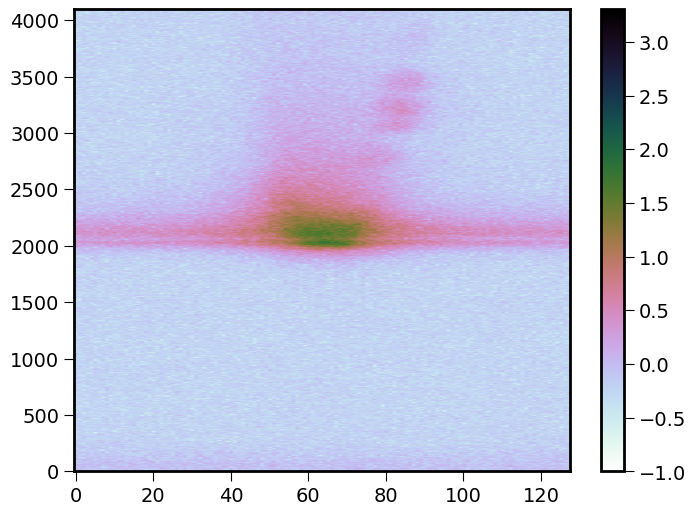

In [28]:
plotthis = np.log10(np.abs(fftshift(best)))
#plotthis = np.log10(np.abs(y_n))
plt.imshow(plotthis.T, aspect="auto", origin="lower", cmap="cubehelix_r", vmin=-1)
plt.colorbar()

In [ ]:
plt.plot(np.real(x_n.T[1]))

In [30]:
            x_n = np.copy(best)
            y_n = np.copy(best)